## Overview of the Project ##

- The dataset contains <b>1460 rows and 81 columns</b> and has data of houses sold during the period 2006-2010 in the city of Ames, IA.
- The dataset has 43 categorical and 38 numerical fields which we can use.
- 19 columns were identified as having NULL values, out of which 4 columns have more than 70 percent were NULL, which were dropped
* We ran a <b>Heat Map</b> to check for Variable Co-relation . We have minimal co-relation which is good
* We ran check for outliers and acted on that data as appropriate. <b>Removed LotArea greater than 50,000 sq. ft</b>
* Created New Features for <b>Total Square Feet</b>.
- Adjusted for Inflation using <b>CPI package </b>
- Created a <b>data pipeline for Numerical and Categorical Features </b>which did the following:
    - Scalers to scale the data to better fit the model
    - Ran One Hot Encoding on categorical data
- Finally executed <b>Linear Regression, Ridge and XG Boost</b> to train the Model using <b>GridSearchCV</b> to test multiple parameters.
- Identified <b> Linear Regression </b> as the best performing model by comparing the results and persisted it to apply on test data.
- We predicted on our WISH LIST of houses to get the predictions.
- We also downloaded the latest housing data sets for <b>Newark-DE, Wilmington-DE, Bear-DE and Ames-IA</b> and used the saved model to predict the house prices.
- A web app was developed using Streamlit and deployed to Heroku which can be accessed using:
    - url


### Summary of the R2 Squares and Mean Absolute Errors

### Conclusion

### Initial Data Analysis
- The dataset contains 1460 rows and 81 columns and has data of houses sold during the period 2006-2010 in the city of Ames, IA.
- The dataset has 43 categorical and 38 numerical fields which we can use.
- Executed Describe, info() to find the type of data and 19 columns were identified as having NULL values
- Out of 19, 4 columns having more than 70 percent NULLs were dropped
- Correlation ----- to be added, describe the trends and collinearity
- ------High, Low , mean for the columns which we selected

### Inflation Adjustment
- Installed and imported the cpi package
- Used Year sold and the current Price to get the Adjusted SalesPrice.


### Data Cleansing
- Out of 19 which had nulls, 4 columns having more than 70 percent NULLs were dropped
- Ran box plot for finding outliers and LotArea greater than 50,000 sq.ft. were eliminated
- Plotted histogram for the columns: LotArea,BldgType,HouseStyle,YearBuilt,FullBath,HalfBath,BedroomAbvGr  ---- to be added, observations
- Ploted boxplot: to be added , observations
- relationships of columns with SalesPrice - scatterplots

### Imputers
- No data elements were NULLs and so nothing was

### PCA
- we will have to do a PCA to pick the top features

### Feature Engineering
- Added Total Square Feet which is total of Basement, 1st and 2nd floor square feet.

### Data Pre-processing pipeline
- Missing data
- Feature scaling (important for certain model such as Gradient Descent based models)
- Categorical feature encoding
- Outlier removal
- Transformation
- Custom processing

### Model Training, Tuning & Evaluation
### Final Selection of Model
### Prediction using the test datasets

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.stats import norm, skew
from IPython.display import display, HTML

import seaborn as sns
from sklearn import metrics

import cpi
cpi.update()

### Data Set

In [74]:
housingData=pd.read_csv('Data/housing.csv')
housingData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Basic EDA

- The dataset has shape of 1460x81 and has 43 numerical and 38 categorical columns
- Few of the numerical columns can be interpreted as categorical features such as OverallQual, OverallCond, # of Baths, Kitchens, years.
- Few of the fields have more than 80% as single value in the data and should be careful while using these as it will skew the results.
    - MSZoning, LandContour, LandSlope, BldgType etc.

In [75]:
housingData.shape

(1460, 81)

In [77]:
# divide data into categorical and numerical features
cat, num = [], []
for i in housingData.columns:
    d = housingData.dtypes[i]
    if d == 'object':
        cat.append(i)
    else:
        num.append(i)

print("Categorical: {}".format(cat))
print("\n")
print("------------------------------------------------------------------------------------")
print("\n")
print("Numerical: {}".format(num))

Categorical: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


------------------------------------------------------------------------------------


Numerical: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Kitch

In [78]:
# Checking length of categorical and numerical
print("Length of categorical: {}".format(len(cat)))
print("Length of numerical: {}".format(len(num)))

Length of categorical: 43
Length of numerical: 38


In [165]:
# Referred from kaggle (https://www.kaggle.com/stefanschulmeister87/visual-data-inspection-and-xgboost)

column_informations = {}
num_values = len(housingData)
for col in housingData.columns:
    num_unique = housingData[col].nunique()
    num_nulls = round(housingData[col].isna().sum()/num_values,2)
    d_type = housingData.dtypes[col]
    
    if (num_unique < 30):
        # discrete column
        info_str = "["
        value_counts = housingData[col].value_counts()
        single_value_weight = round(value_counts.iloc[0] / num_values, 2)
        for index, value in value_counts.items():
            info_str += f"{value} X {index}, "
        column_informations[col] = {"d_type":d_type, "discret": True, "percentage_of_missing_values": num_nulls, "single_value_weight": single_value_weight,
                                    "min": 0.0, "max": 0.0, "mean": 0.0, "median": 0.0, "info_str": info_str[:-2] + "]"} 
    else:
        # continuous column
        if d_type == "int64" or d_type == "float64":
            column_informations[col] = {"d_type":d_type, "discret": False, "percentage_of_missing_values": num_nulls, "single_value_weight": 0.0,
                                        "min": housingData[col].min(), "max": housingData[col].max(), "mean": round(housingData[col].mean(), 2),
                                        "median": round(housingData[col].median(), 2), "info_str": ""}
        else:
            column_informations[col] = {"d_type":d_type, "discret": False, "percentage_of_missing_values": num_nulls, "min": "-", "max": "-",
                                        "mean": "-", "median": "-", "info_str": ""}

# build DataFrame from dictionary
info_df = pd.DataFrame.from_dict(column_informations, orient='index')

### Discrete Columns Information

In [166]:
display(HTML(info_df[info_df["discret"]==True][["d_type", "percentage_of_missing_values", "single_value_weight", "info_str"]].to_html()))
print(len(info_df[info_df["discret"]==True]))

,d_type,percentage_of_missing_values,single_value_weight,info_str
MSSubClass,int64,0.00,0.37,"[530 X 20, 296 X 60, 143 X 50, 87 X 120, 69 X 30, 63 X 160, 60 X 70, 58 X 80, 52 X 90, 29 X 190, 20 X 85, 16 X 75, 12 X 45, 10 X 180, 4 X 40]"
MSZoning,object,0.00,0.79,"[1140 X RL, 218 X RM, 65 X FV, 16 X RH, 10 X C (all)]"
Street,object,0.00,1.00,"[1444 X Pave, 5 X Grvl]"
LotShape,object,0.00,0.64,"[925 X Reg, 479 X IR1, 37 X IR2, 8 X IR3]"
LandContour,object,0.00,0.90,"[1311 X Lvl, 61 X Bnk, 48 X HLS, 29 X Low]"
Utilities,object,0.00,1.00,"[1448 X AllPub, 1 X NoSeWa]"
LotConfig,object,0.00,0.72,"[1048 X Inside, 260 X Corner, 90 X CulDSac, 47 X FR2, 4 X FR3]"
LandSlope,object,0.00,0.95,"[1380 X Gtl, 61 X Mod, 8 X Sev]"
Neighborhood,object,0.00,0.16,"[225 X NAmes, 150 X CollgCr, 113 X OldTown, 99 X Edwards, 86 X Somerst, 79 X Gilbert, 77 X NridgHt, 74 X Sawyer, 73 X NWAmes, 59 X SawyerW, 58 X BrkSide, 51 X Crawfor, 49 X Mitchel, 41 X NoRidge, 37 X IDOTRR, 35 X Timber, 25 X SWISU, 24 X StoneBr, 23 X ClearCr, 17 X Blmngtn, 17 X MeadowV, 16 X BrDale, 10 X Veenker, 9 X NPkVill, 2 X Blueste]"
Condition1,object,0.00,0.86,"[1251 X Norm, 79 X Feedr, 48 X Artery, 26 X RRAn, 19 X PosN, 11 X RRAe, 8 X PosA, 5 X RRNn, 2 X RRNe]"


57


### Continuous Columns Information

In [167]:
display(HTML(info_df[info_df["discret"]==False][["d_type", "percentage_of_missing_values", "min", "max", "mean", "median"]].to_html()))
print(len(info_df[info_df["discret"]==False]))

,d_type,percentage_of_missing_values,min,max,mean,median
Id,int64,0.00,1.000000,1460.000000,731.61,733.00
LotFrontage,float64,0.17,21.000000,313.000000,69.81,69.50
LotArea,int64,0.00,1300.000000,46589.000000,9867.88,9450.00
YearBuilt,int64,0.00,1872.000000,2010.000000,1971.24,1973.00
YearRemodAdd,int64,0.00,1950.000000,2010.000000,1984.86,1994.00
MasVnrArea,float64,0.01,0.000000,1600.000000,102.93,0.00
BsmtFinSF1,int64,0.00,0.000000,2260.000000,435.70,379.00
BsmtFinSF2,int64,0.00,0.000000,1474.000000,46.00,0.00
BsmtUnfSF,int64,0.00,0.000000,2336.000000,568.88,481.00
TotalBsmtSF,int64,0.00,0.000000,3206.000000,1050.59,990.00


22


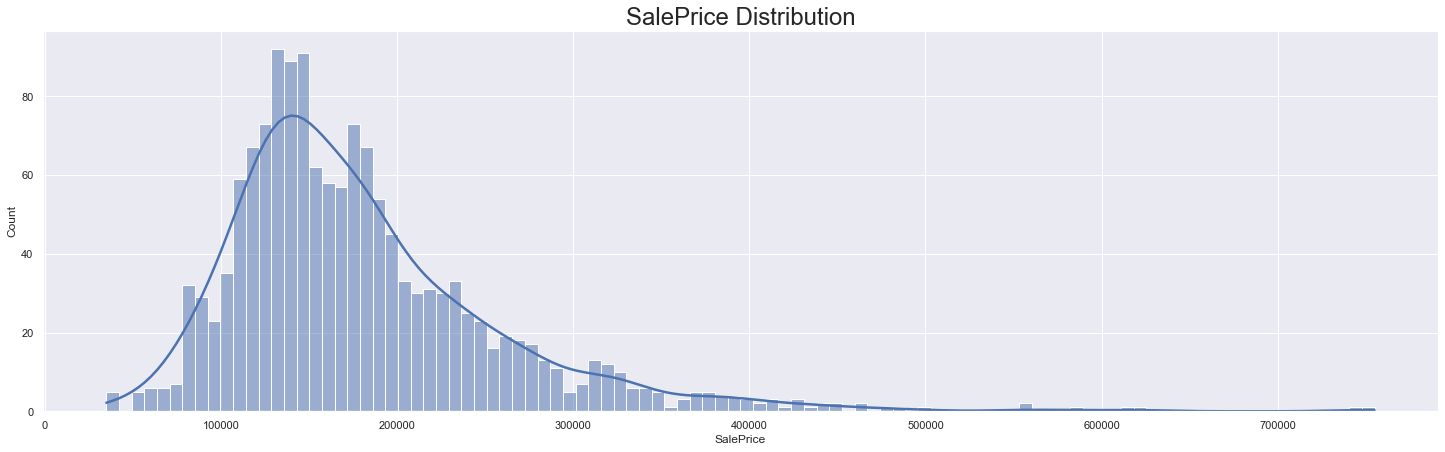

In [170]:
fig = plt.figure(figsize=(25,7))
sns.histplot(data = housingData,x="SalePrice", kde=True, bins=100, palette="Set2", multiple="stack").set_title('SalePrice Distribution', fontdict= {'fontsize': 24});

### Adjust for inflation using CPI

- Use YrSold and SalePrice to adjust the dollar to current date.

In [91]:
housingData['ADJUSTED_SalesPrice'] = housingData.apply(lambda x: cpi.inflate(x.SalePrice, x.YrSold), axis=1)

### Find missing Data

- 19 columns have missing data
- Alley, PoolQC, Fence and MiscFeature have more than 70% missing values so we decided to drop these fields.

In [79]:
def find_missing_percent(data):
    """
    Returns dataframe containing the total missing values and percentage of total
    missing values of a column.
    """
    miss_df = pd.DataFrame({'ColumnName':[],'TotalMissingVals':[],'PercentMissing':[]})
    for col in data.columns:
        sum_miss_val = data[col].isnull().sum()
        percent_miss_val = round((sum_miss_val/data.shape[0])*100,2)
        miss_df = miss_df.append(dict(zip(miss_df.columns,[col,sum_miss_val,percent_miss_val])),ignore_index=True)
    return miss_df

In [80]:
miss_df = find_missing_percent(housingData)
'''Displays columns with missing values'''
display(miss_df[miss_df['PercentMissing']>0.0])
print("\n")

print("Number of columns with missing values:"+(str(miss_df[miss_df['PercentMissing']>0.0].shape[0])))

,ColumnName,TotalMissingVals,PercentMissing
3,LotFrontage,259.0,17.74
6,Alley,1369.0,93.77
25,MasVnrType,8.0,0.55
26,MasVnrArea,8.0,0.55
30,BsmtQual,37.0,2.53
31,BsmtCond,37.0,2.53
32,BsmtExposure,38.0,2.60
33,BsmtFinType1,37.0,2.53
35,BsmtFinType2,38.0,2.60
42,Electrical,1.0,0.07




Number of columns with missing values:19


In [81]:
drop_cols = miss_df[miss_df['PercentMissing'] >70.0].ColumnName.tolist()

print("Number of columns with more than 70%:"+ str(len(drop_cols)))
housingData = housingData.drop(drop_cols,axis=1)
#test = test.drop(drop_cols,axis =1)

miss_df = miss_df[miss_df['ColumnName'].isin(housingData.columns)]
'''Columns to Impute'''
impute_cols = miss_df[miss_df['TotalMissingVals']>0.0].ColumnName.tolist()
miss_df[miss_df['TotalMissingVals']>0.0]

Number of columns with more than 70%:4


,ColumnName,TotalMissingVals,PercentMissing
3,LotFrontage,259.0,17.74
25,MasVnrType,8.0,0.55
26,MasVnrArea,8.0,0.55
30,BsmtQual,37.0,2.53
31,BsmtCond,37.0,2.53
32,BsmtExposure,38.0,2.60
33,BsmtFinType1,37.0,2.53
35,BsmtFinType2,38.0,2.60
42,Electrical,1.0,0.07
57,FireplaceQu,690.0,47.26


### Basic Stats

- Few Observations
- The 

In [83]:
housingData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


#### Following were the observations for LotArea and checking for Distribution and Box plot for outliers:
* Run a HISTOGRAM on LotArea as that is typically the most import for a price! Run for where value is not null
* Histogram to see the frequency ranges and it shows 500 sq as most common
* Run a Distribution plot to validate the same
* Run a BOX PLOT which is very important to check for OUTLIERS

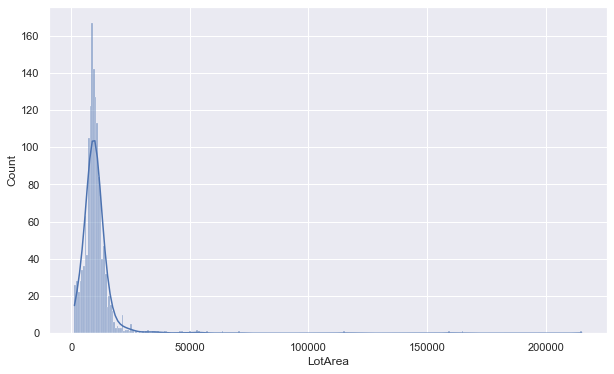

In [84]:
sns.set()
plt.figure(figsize=(10,6))
sns.histplot(housingData['LotArea'], kde=True)
plt.show()

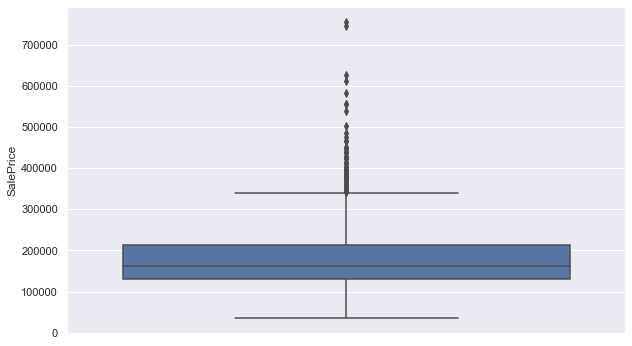

In [85]:
plt.figure(figsize=(10,6))
sns.boxplot(y='SalePrice',data=housingData)
plt.show()

### Removing Outlier

In order to avoid outliers, LotArea greater than 50,000 sq.ft. were eliminated 

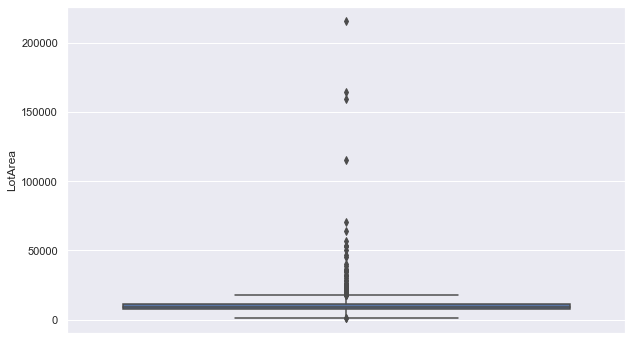

In [86]:
plt.figure(figsize=(10,6))
sns.boxplot(y='LotArea',data=housingData)
plt.show()

Text(0, 0.5, 'SalePrice')

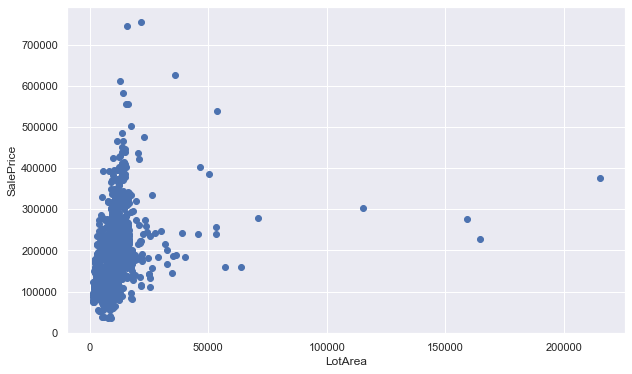

In [87]:
# Analysing the LotArea Feature against SalePrice
plt.figure(figsize=(10,6))
plt.scatter(housingData.LotArea, housingData.SalePrice)
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
# it shows outliers in it

In [88]:
# Dropping lotArea greater than 50000 to remove outlier 
housingData = housingData[housingData.LotArea <= 50000].copy()
housingData.shape

(1449, 77)

Text(0, 0.5, 'SalePrice')

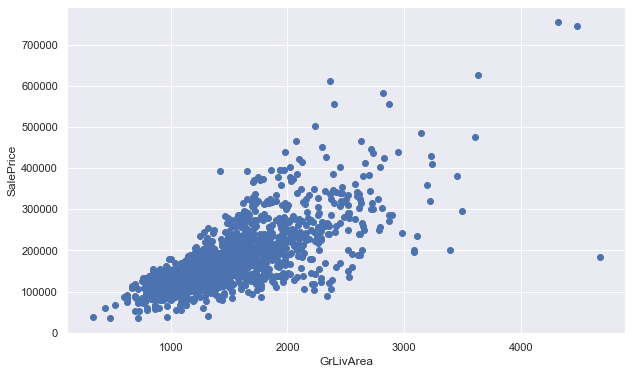

In [89]:
# Observing the Column output GrLivArea against Output SalePrice
# To check for outliers
plt.figure(figsize=(10,6))
plt.scatter(housingData.GrLivArea, housingData.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

### Attribute Correlation Metrics

- 

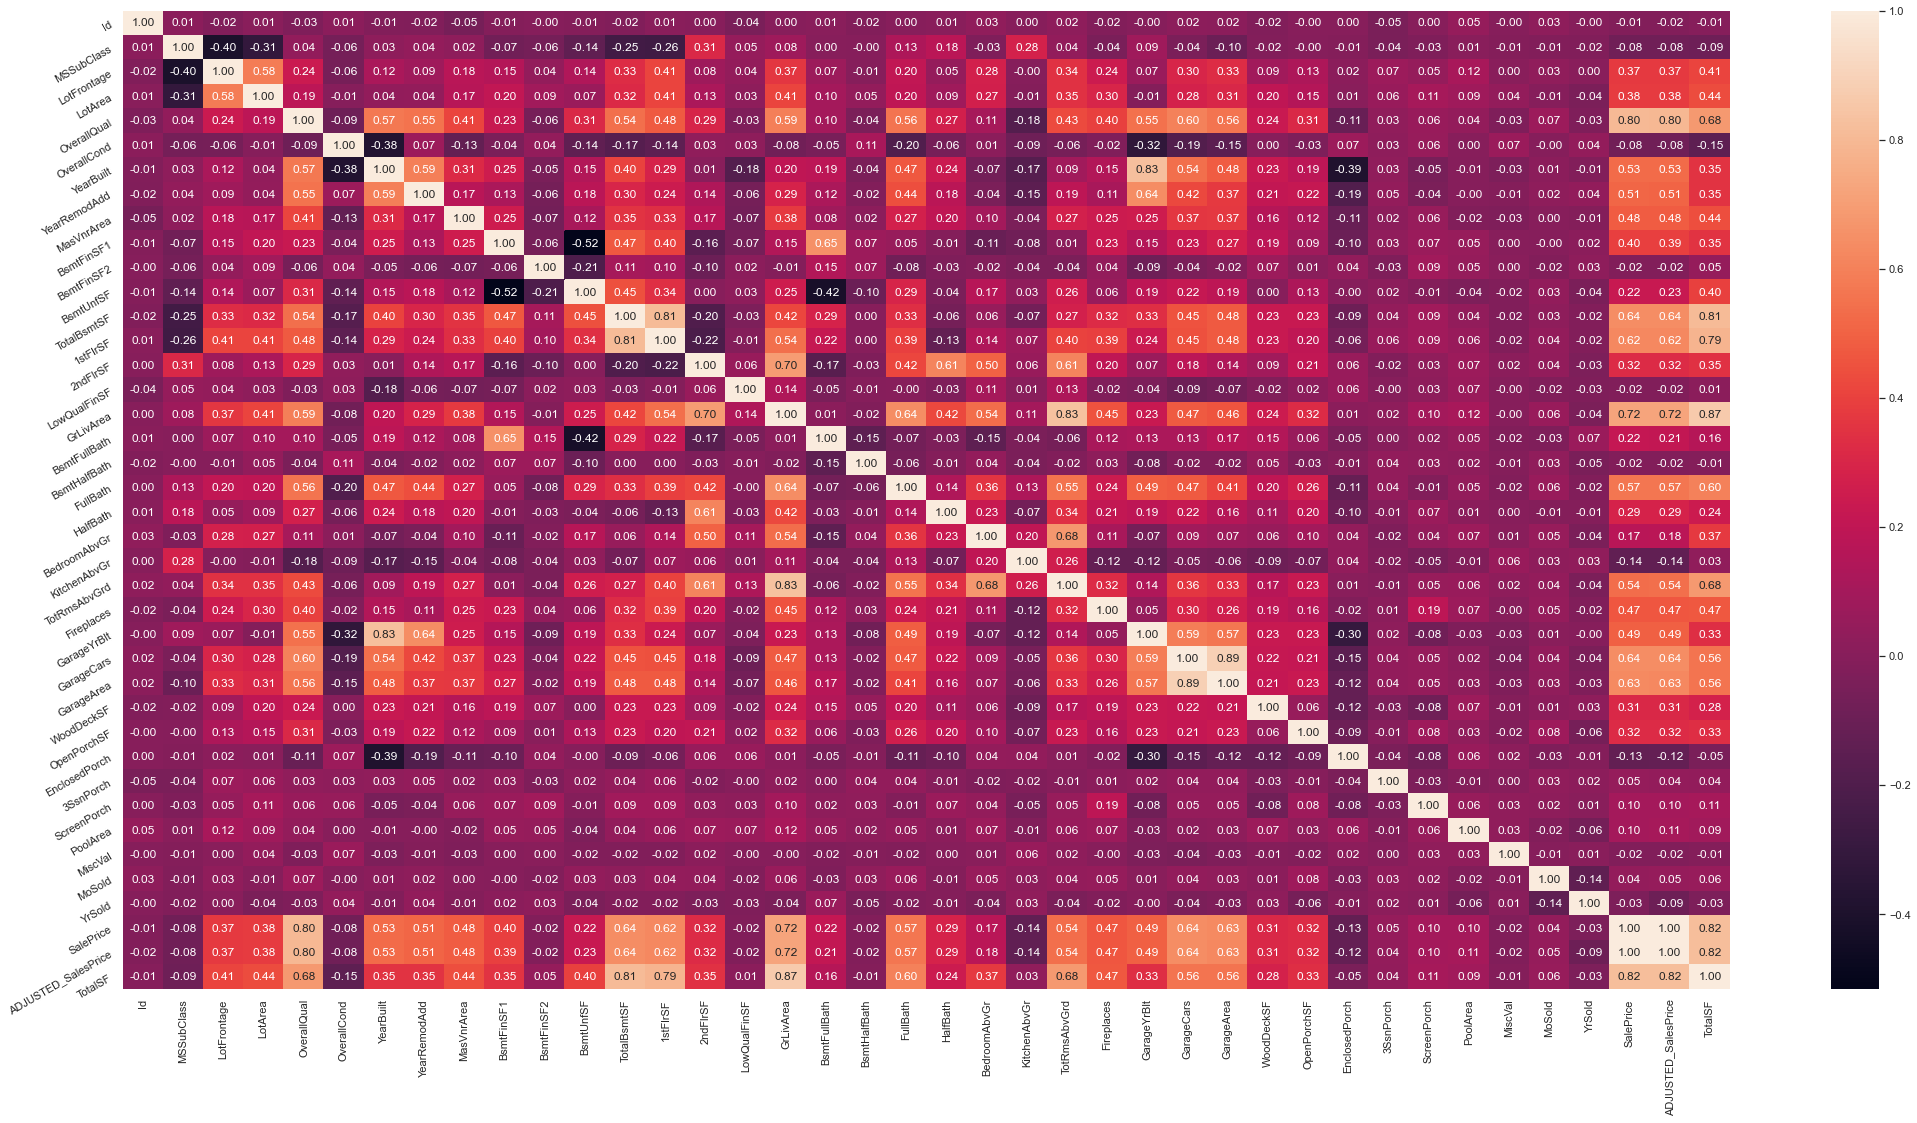

In [160]:
corr = housingData.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(36,18))
a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [171]:
number_of_price_groups = 5
number_of_values_per_group = len(housingData)/number_of_price_groups

visual_df = housingData.copy()
visual_df.sort_values(by=['SalePrice'], inplace=True, ignore_index=True)

# get group ranges (we want the same amount of members in each group)
last_boundary = 0
bounder_dict={}
for i in range(number_of_price_groups):
    boundary = visual_df.iloc[int((i+1)*number_of_values_per_group) - 1]["SalePrice"]
    bounder_dict[f"{last_boundary}-{boundary}"] = [last_boundary, boundary]
    last_boundary = boundary

def get_price_group(price, bounder_dict):
    group_lable = "-"
    for group in bounder_dict.keys():
        if bounder_dict[group][0] < price <= bounder_dict[group][1]:
            group_lable=group
    return group_lable
    
visual_df["PriceGroup"]=visual_df["SalePrice"].map(lambda x: get_price_group(x, bounder_dict));

In [172]:
# let's check:
indexs =[]
for group in visual_df["PriceGroup"].unique():
    indexs.append(visual_df[["SalePrice", "PriceGroup"]][visual_df["PriceGroup"]==group].head(1).index[0])
visual_df.loc[indexs][["SalePrice", "PriceGroup"]]

,SalePrice,PriceGroup
0,34900,0-123600
289,124000,123600-146500
579,146800,146500-178900
869,179000,178900-229000
1159,229456,229000-755000


- For visualization, it will be good to group the prices onto manageable levels.
- The above groups look good

In [174]:
date_features = ["YearBuilt", "YearRemodAdd", "GarageYrBlt", "MoSold", "YrSold"]
info_df.loc[date_features]

,d_type,discret,percentage_of_missing_values,single_value_weight,min,max,mean,median,info_str
YearBuilt,int64,False,0.00,0.00,1872.0,2010.0,1971.24,1973.0,
YearRemodAdd,int64,False,0.00,0.00,1950.0,2010.0,1984.86,1994.0,
GarageYrBlt,float64,False,0.06,0.00,1900.0,2010.0,1978.52,1980.0,
MoSold,int64,True,0.00,0.17,0.0,0.0,0.00,0.0,"[247 X 6, 234 X 7, 204 X 5, 141 X 4, 121 X 8, ..."
YrSold,int64,True,0.00,0.23,0.0,0.0,0.00,0.0,"[337 X 2009, 326 X 2007, 312 X 2006, 301 X 200..."


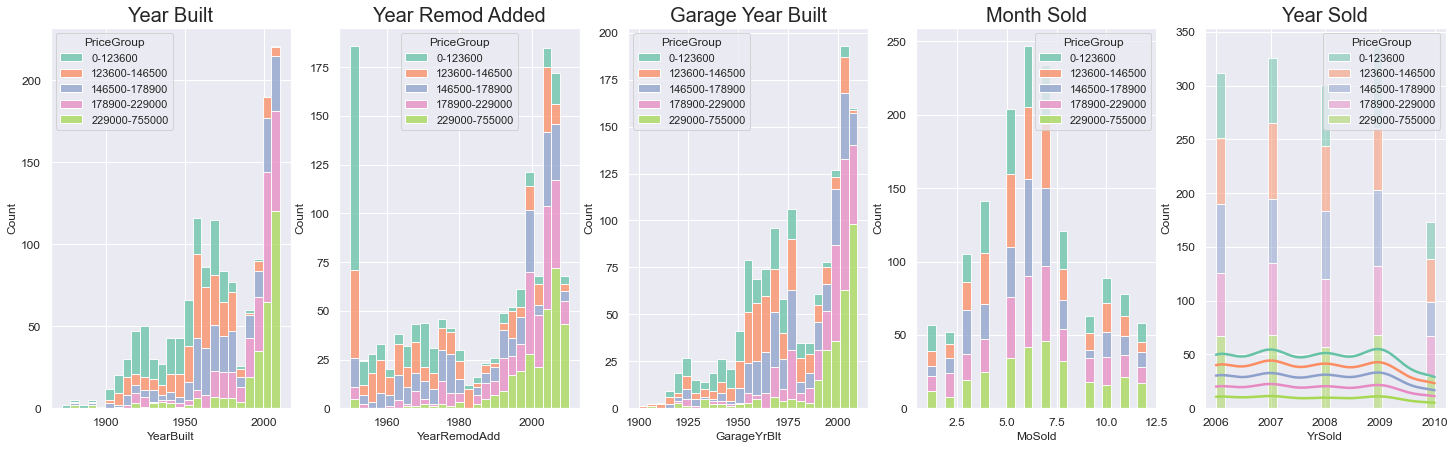

In [175]:
# build figure
fig = plt.figure(figsize=(25,7))

# add grid to figure
gs = fig.add_gridspec(1,5)

# fill grid with subplots
ax00 = fig.add_subplot(gs[0,0])
ax01 = fig.add_subplot(gs[0,1])
ax02 = fig.add_subplot(gs[0,2])
ax03 = fig.add_subplot(gs[0,3])
ax04 = fig.add_subplot(gs[0,4])


# adjust subheadline fontsize
ax00.set_title('Year Built', fontsize=20)
ax01.set_title('Year Remod Added', fontsize=20)
ax02.set_title('Garage Year Built', fontsize=20)
ax03.set_title('Month Sold', fontsize=20)
ax04.set_title('Year Sold', fontsize=20)

# adjust lable fontsize
ax00.tick_params(labelsize=12)
ax01.tick_params(labelsize=12)
ax02.tick_params(labelsize=12)
ax03.tick_params(labelsize=12)
ax04.tick_params(labelsize=12)

# plot (ax=axxx is important)
sns.histplot(data = visual_df,x="YearBuilt", kde=False, ax=ax00, bins=25, palette="Set2", multiple="stack", hue="PriceGroup")
sns.histplot(data = visual_df,x="YearRemodAdd", kde=False, ax=ax01, bins=25, palette="Set2", multiple="stack", hue="PriceGroup")
sns.histplot(data = visual_df,x="GarageYrBlt", kde=False, ax=ax02, bins=25, palette="Set2", multiple="stack", hue="PriceGroup")
sns.histplot(data = visual_df,x="MoSold", kde=False, ax=ax03, bins=25, palette="Set2", multiple="stack", hue="PriceGroup")
sns.histplot(data = visual_df,x="YrSold", kde=True, ax=ax04, bins=25, palette="Set2", multiple="stack", hue="PriceGroup");

### Skewness Levels on numerical Features

- Applying skewness, we find that the below fields are highly skewed.

In [90]:
# Checking skewness level on numerical features to remove
skewed_feats = housingData[num].apply(lambda x: skew(x.dropna())).\
sort_values(ascending=False)
skewness = pd.DataFrame({"Skewness ": skewed_feats})
skewness

,Skewness
MiscVal,24.427220
PoolArea,15.882700
3SsnPorch,10.253854
LowQualFinSF,8.966866
KitchenAbvGr,4.464409
BsmtFinSF2,4.284977
ScreenPorch,4.129883
BsmtHalfBath,4.113098
EnclosedPorch,3.073602
MasVnrArea,2.693526


- We will not remove outliers from every feature as it may affect the model since test set will have outliers too and our model needs to be robust against them

### Adding new feature

In [92]:
# Adding one extra feature -> total sqfootage feature 
housingData['TotalSF'] = housingData['TotalBsmtSF'] + housingData['1stFlrSF'] + housingData['2ndFlrSF']

In [125]:
X=housingData[['LotArea','BldgType','HouseStyle','YearBuilt','FullBath','HalfBath','BedroomAbvGr','TotalSF']].copy()
Y=housingData[['ADJUSTED_SalesPrice']]
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LotArea       1449 non-null   int64 
 1   BldgType      1449 non-null   object
 2   HouseStyle    1449 non-null   object
 3   YearBuilt     1449 non-null   int64 
 4   FullBath      1449 non-null   int64 
 5   HalfBath      1449 non-null   int64 
 6   BedroomAbvGr  1449 non-null   int64 
 7   TotalSF       1449 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 101.9+ KB


array([[<AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'HalfBath'}>],
       [<AxesSubplot:title={'center':'BedroomAbvGr'}>,
        <AxesSubplot:title={'center':'TotalSF'}>]], dtype=object)

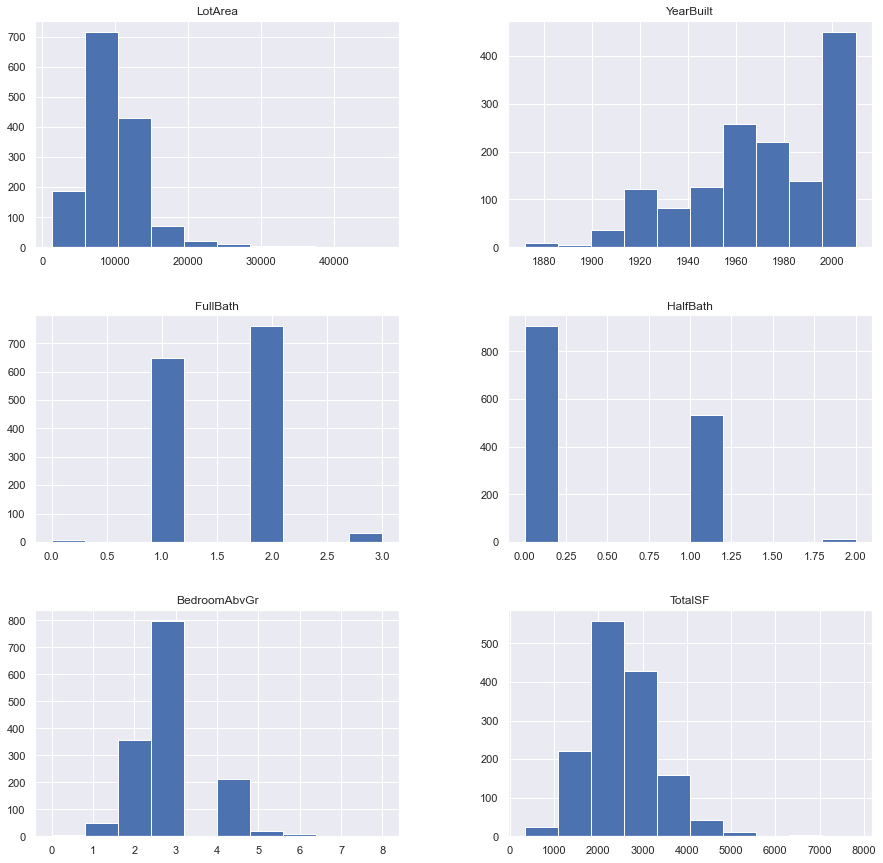

In [126]:
X.hist(figsize=(15,15))

array([[<AxesSubplot:title={'center':'ADJUSTED_SalesPrice'}>]],
      dtype=object)

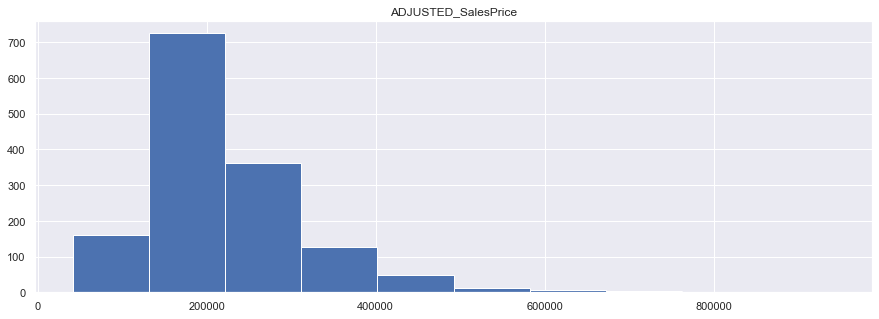

In [95]:
Y.hist(figsize=(15,5))

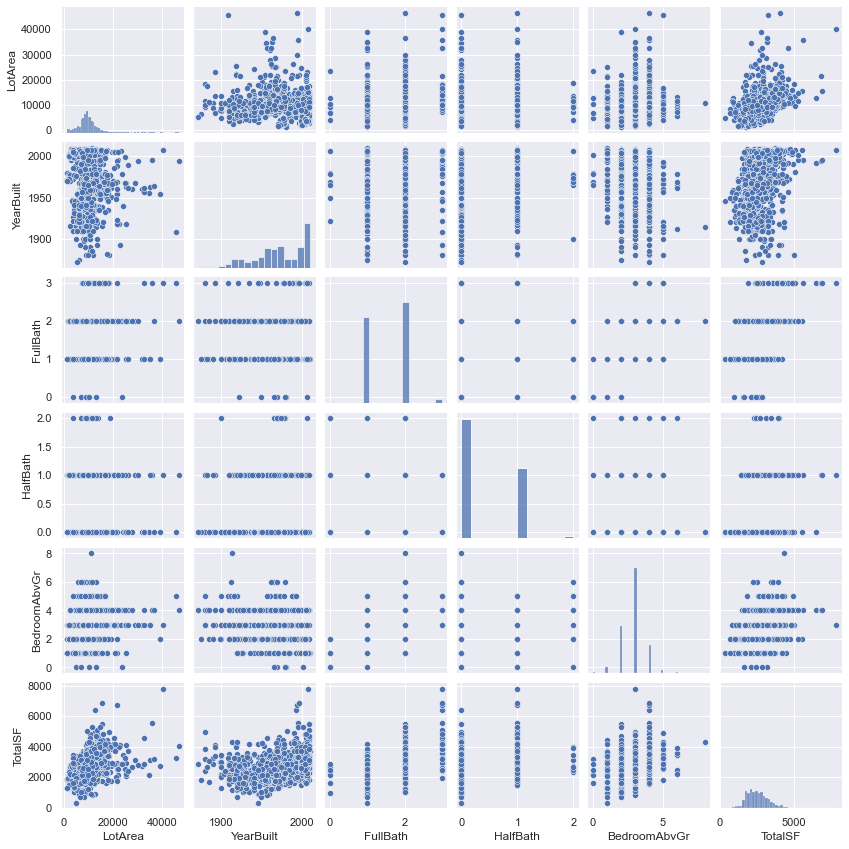

In [129]:
sns.pairplot(X[['LotArea', 'YearBuilt', 'FullBath', 'HalfBath','BedroomAbvGr','TotalSF']], height=2)

### Split the data into train and test

In [127]:
# Split the data into a training set and a test set. 
# Any number for the random_state is fine, see 42: https://en.wikipedia.org/wiki/42_(number) 
# We choose to use 20% (test_size=0.2) of the data set as the test set.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1159, 8)
(290, 8)
(1159, 1)
(290, 1)


In [130]:
num_features =['LotArea', 'YearBuilt', 'FullBath', 'HalfBath','BedroomAbvGr','TotalSF']
cat_features = ['BldgType','HouseStyle']

## Data pre-processing
We will build a pipeline to do some of the following tasks:

- Missing data
- Feature scaling (important for certain model such as Gradient Descent based models)
- Categorical feature encoding
- Outlier removal
- Transformation
- Custom processing

In [131]:
# any missing values?
X_train.isnull().sum()

LotArea         0
BldgType        0
HouseStyle      0
YearBuilt       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
TotalSF         0
dtype: int64

In [132]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

# Create the preprocessing pipeline for numerical features
# Pipeline(steps=[(name1, transform1), (name2, transform2), ...]) 
# NOTE the step names can be arbitrary

# Step 1 is feature scaling via standardization - making features look like normal-distributed 
# see sandardization: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
num_pipeline = Pipeline(
    steps=[
        #('poly',PolynomialFeatures(degree =2)),  # we will tune differet strategies later
        ('scaler', StandardScaler())
        ]
)

# Create the preprocessing pipelines for the categorical features
# There are two steps in this pipeline:
# Step 1: one hot encoding

cat_pipeline = Pipeline(
    steps=[
                ('onehot', OneHotEncoder())
    ]
)

# Assign features to the pipelines and Combine two pipelines to form the preprocessor
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, num_features),
        ('cat_pipeline', cat_pipeline, cat_features),
    ]
)

## Model traning, tuning, evaluation and selection

Next, we attach three different models (Linear, Ridge, XGBoost) to the same pre-processing pipeline and tune the some parameters using GridSearch with cross validation. Then, we compare their performance and choose the best model to proceed. 

### Using Linear Regression

In [133]:
# we show how to use GridSearch with K-fold cross validation (K=10) to fine tune the model
# we use the accuracy as the scoring metric with training score return_train_score=True
from sklearn.model_selection import GridSearchCV

# try Linear Regression
from sklearn.linear_model import LinearRegression

# rf pipeline
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearRegression()),
])

parameters_lr=[
    {
        'classifier__fit_intercept': [True,False],
        'classifier__copy_X': [True, False],
        'classifier__normalize': [True, False]
    }
]                 

grid_search_lr = GridSearchCV(pipeline_lr,parameters_lr, cv=2)

In [134]:
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['LotArea',
                                                                          'YearBuilt',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'TotalSF']),
                                                                        ('cat_pipeline',
               

In [135]:
# check the best performing parameter combination
grid_search_lr.best_params_

{'classifier__copy_X': True,
 'classifier__fit_intercept': True,
 'classifier__normalize': True}

In [136]:
# build-in CV results keys
sorted(grid_search_lr.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_classifier__copy_X',
 'param_classifier__fit_intercept',
 'param_classifier__normalize',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [137]:
# best linear regression model test score
grid_search_lr.best_score_

0.7541336100134259

### Using Ridge Classifier

In [138]:
from sklearn.linear_model import Ridge

# rf pipeline
pipeline_rg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf_RG', Ridge()),
])

parameters_rg=[
    {
        'clf_RG__alpha': [0,0.2,0.01,1.0],
        'clf_RG__copy_X': [True, False],
        'clf_RG__fit_intercept': [True, False]
    }
]                 

grid_search_rg = GridSearchCV(pipeline_rg,parameters_rg, cv=5)

In [139]:
grid_search_rg.fit(X_train, y_train)

D:\Softwares\anaconda3\envs\MISY631\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.79025e-18): result may not be accurate.
  overwrite_a=True).T
D:\Softwares\anaconda3\envs\MISY631\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.13588e-18): result may not be accurate.
  overwrite_a=True).T
D:\Softwares\anaconda3\envs\MISY631\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.41949e-18): result may not be accurate.
  overwrite_a=True).T
D:\Softwares\anaconda3\envs\MISY631\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.57366e-18): result may not be accurate.
  overwrite_a=True).T
D:\Softwares\anaconda3\envs\MISY631\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.45022e-18): result may not be accurate.
  overwrite_a=True).T
D:\So

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['LotArea',
                                                                          'YearBuilt',
                                                                          'FullBath',
                                                                          'HalfBath',
                                                                          'BedroomAbvGr',
                                                                          'TotalSF']),
                                                                        ('cat_pipeline',
               

In [140]:
# best linear regression model test score
grid_search_rg.best_score_

0.750280991518333

In [141]:
# best test score
print('best linear regression score is: ', grid_search_lr.best_score_)
print('best Ridge classifier score is: ', grid_search_rg.best_score_)

best linear regression score is:  0.7541336100134259
best Ridge classifier score is:  0.750280991518333


In [142]:
# select the best model
# the best parameters are shown, note SimpleImputer() implies that mean strategry is used
clf_best = grid_search_lr.best_estimator_

In [143]:
from sklearn.metrics import accuracy_score

In [144]:
# final test on the testing set
# To predict on new data: simply calling the predict method 
# the full pipeline steps will be applied to the testing set followed by the prediction
y_pred = clf_best.predict(X_test)

# calculate accuracy, Note: y_test is the ground truth for the tesing set
# we have similiar score for the testing set as the cross validation score - good

#print('Accuracy Score :' (accuracy_score(y_test, y_pred)))

In [145]:
#===========   R-square and other metrics ===================
r_square= metrics.r2_score(y_test, y_pred)
mae_y = metrics.mean_absolute_error(y_test, y_pred)
mse_y = metrics.mean_squared_error(y_test, y_pred)
rmse_y = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print("Linear::r_square={0}::mean_absolute_error={1}::mean_square_error={2}::sqrt_mean_square_error={3}::".format(r_square,mae_y,mse_y,rmse_y))

Linear::r_square=0.7431858714633894::mean_absolute_error=29315.069411308454::mean_square_error=1993147863.3846052::sqrt_mean_square_error=44644.684603932474::


## Feature Importance

Given that we are using pipeline and one-hot encoding, the feature importance scores are not very straightforward to get. The following code shows how to get the feature importance scores from the Linear regression and create a plot.

In [146]:
clf_best.named_steps

{'preprocessor': ColumnTransformer(transformers=[('num_pipeline',
                                  Pipeline(steps=[('scaler', StandardScaler())]),
                                  ['LotArea', 'YearBuilt', 'FullBath',
                                   'HalfBath', 'BedroomAbvGr', 'TotalSF']),
                                 ('cat_pipeline',
                                  Pipeline(steps=[('onehot', OneHotEncoder())]),
                                  ['BldgType', 'HouseStyle'])]),
 'classifier': LinearRegression(normalize=True)}

In [147]:
clf_best.named_steps['preprocessor']

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['LotArea', 'YearBuilt', 'FullBath',
                                  'HalfBath', 'BedroomAbvGr', 'TotalSF']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('onehot', OneHotEncoder())]),
                                 ['BldgType', 'HouseStyle'])])

In [148]:
i = clf_best.named_steps['classifier'].coef_
i

array([[ 6.35549940e+03,  2.42593552e+04,  4.64690816e+03,
         6.46679277e+01, -1.46050197e+04,  6.93929816e+04,
         1.28962758e+04, -4.24569305e+02, -3.16961438e+04,
        -1.84793505e+04, -2.28306262e+03, -1.64696958e+03,
         6.68327850e+03, -1.21062080e+04,  2.48875560e+03,
        -7.46087257e+03,  1.39546663e+04,  4.73316506e+03,
         2.95116350e+03]])

In [149]:
clf_best['preprocessor'].transformers_

[('num_pipeline',
  Pipeline(steps=[('scaler', StandardScaler())]),
  ['LotArea', 'YearBuilt', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotalSF']),
 ('cat_pipeline',
  Pipeline(steps=[('onehot', OneHotEncoder())]),
  ['BldgType', 'HouseStyle'])]

In [150]:
# get columnTransformer
clf_best[0] 

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['LotArea', 'YearBuilt', 'FullBath',
                                  'HalfBath', 'BedroomAbvGr', 'TotalSF']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('onehot', OneHotEncoder())]),
                                 ['BldgType', 'HouseStyle'])])

In [151]:
clf_best[0].transformers_

[('num_pipeline',
  Pipeline(steps=[('scaler', StandardScaler())]),
  ['LotArea', 'YearBuilt', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotalSF']),
 ('cat_pipeline',
  Pipeline(steps=[('onehot', OneHotEncoder())]),
  ['BldgType', 'HouseStyle'])]

In [152]:
num_original_feature_names = clf_best[0].transformers_[0][2]
num_original_feature_names

['LotArea', 'YearBuilt', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotalSF']

In [153]:
cat_original_feature_names = clf_best[0].transformers_[1][2]
cat_original_feature_names

['BldgType', 'HouseStyle']

In [154]:
cat_new_feature_names = list(clf_best[0].transformers_[1][1]['onehot'].get_feature_names(cat_original_feature_names))
cat_new_feature_names

['BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_1.5Fin',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl']

In [155]:
feature_names = num_original_feature_names + cat_new_feature_names
feature_names

['LotArea',
 'YearBuilt',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotalSF',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_1.5Fin',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl']

In [159]:
r = pd.DataFrame(i, index=feature_names, columns=['importance'])
r

ValueError: Shape of passed values is (1, 19), indices imply (19, 1)

In [ ]:
r.sort_values('importance', ascending=False)

In [ ]:
r.sort_values('importance', ascending=False).plot.bar()

## Remove unimportant Features

## Persists the model

In [ ]:
# Save the model as a pickle file
import joblib
joblib.dump(clf_best, "clf-best.pickle")

In [ ]:
# Load the model from a pickle file
saved_linear_clf = joblib.load("clf-best.pickle")
saved_linear_clf

In [ ]:
#Load Test Data
testhousingData=pd.read_csv('Data/test.csv')
testhousingData.head()

testhousingData.head()
testhousingData_df=testhousingData[['LotArea','BldgType','HouseStyle','YearBuilt','FullBath','HalfBath','BedroomAbvGr']].copy() #,'

In [ ]:
pred1 = saved_linear_clf.predict(testhousingData_df)

In [ ]:
pred1

## Test Datasets

In [ ]:
newark_df=pd.read_csv('Data/Delaware - Newark.csv')
newark_df.head()

In [ ]:
bear_df=pd.read_csv('Data/Delaware - Bear.csv')
bear_df.head()

In [ ]:
wilmigton_df=pd.read_csv('Data/Delaware - Wilmington.csv')
wilmigton_df.head()

In [ ]:
ames_df=pd.read_csv('Data/IA - Ames.csv')
ames_df.head()